# Appendix, LRF all parameter combinations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lib.dataloader as dl
from lib.tools import mse, dist, lpf, converged, combinations

In [2]:
# Set figure aesthetics
sns.set_context("notebook")
sns.set_style("ticks")

In [3]:
# Load data
keys = ["w", "b", "$\omega$", "$\\tilde{V}_R$", "$\\tilde{I}_R$"]

all_vals = []
for k in range(3):
    if k == 0:
        xticks = []
    vals = []
    for n, comb in enumerate(combinations(5, False)):
        seeds = 30
        prefix = "".join(["1" if x else "0" for x in comb])
        data = dl.DataLoader("../figure4/c/results/", "mode_" + str(k) + "_" + prefix).merge()
        if data == {}:
            print("Data empty")
            break
        seeds = data["ws"].shape[0]
        converged_n = 0
        not_converged = []
        did_converged = []
        for i in range(seeds):
            if data["b_target"][i] == 0.:
                seeds -= 1
                continue
            all_datas = [data[key][i].T for key in ["ws", "b", "omega", "v_reset", "i_reset"]]
            targets = [data[key][i] for key in ["ws_target", "b_target", "omega_target", "v_reset_target", "i_reset_target"]]
            convs = converged(all_datas, targets, [0.05, 0.025, 0.025, 0.1, 0.1])
            if np.any(convs[-50:] < 1):
                continue
            else:
                converged_n += 1
        vals.append((converged_n / seeds) * 100)
        xticks.append(", ".join([keys[i] for i, k in enumerate(prefix) if k == "1"]))
    all_vals.append(vals)

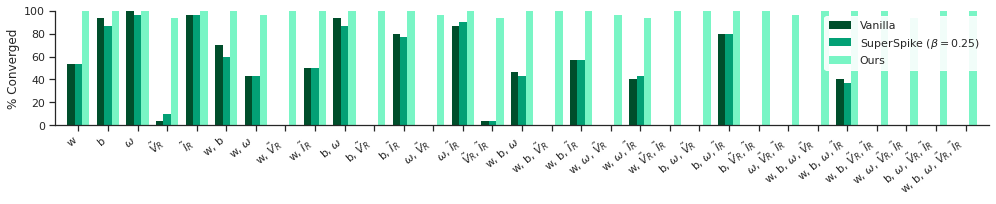

In [4]:
# Plot
colors = sns.color_palette(['#004e2b', '#03a075', '#79f5c5'])

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(14, 3.))
for k in range(3):
    if k == 0:
        label = "Vanilla"
    elif k == 1:
        label = "SuperSpike ($\\beta=0.25$)"
    elif k == 2:
        label = "Ours"
    ax.bar(np.arange(len(all_vals[k]))+(k-1)*0.25, all_vals[k], color=colors[k], width=0.25, linewidth=0., label=label)
ax.legend(shadow=False, edgecolor="w", framealpha=0.9)
#ax.set_xticks(range(len(vals)))
ax.set_xticks(range(31))
ax.set_xticklabels(xticks[:31], rotation=40, ha="right")
sns.despine()

ax.set_xlim(-.8, 30.8)
ax.set_ylim(0., 100.)
ax.set_ylabel("% Converged")
fig.tight_layout()

fig.savefig("appendix-lrf-all-combinations.pdf", pad_inches=0.)